In [1]:
from __future__ import absolute_import, division, print_function

# Import Tensorflow
import tensorflow as tf

# Import Helper
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Progressbar
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)
tf.enable_eager_execution() # Comment this after upgrade tensorflow 2.0

1.15.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_raw = pd.read_csv("gdrive/My Drive/Colab Notebooks/20191223 Digit Recognizer/data/train.csv")
y = df_raw.pop('label')
X = df_raw
X_test = pd.read_csv("gdrive/My Drive/Colab Notebooks/20191223 Digit Recognizer/data/test.csv")

## Preprocess Data

### Normalize Data

In [ ]:
X /= 255
X_test /= 255

### Reshape

In [ ]:
X = X.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [6]:
X.shape

(42000, 28, 28, 1)

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=2)

### Check Data

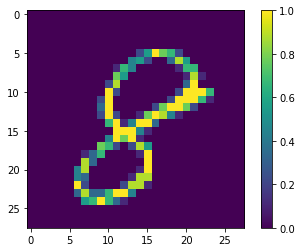

In [9]:
plt.figure()
plt.imshow(X_train[0][:,:,0])
plt.colorbar()
plt.grid(False)
plt.show()

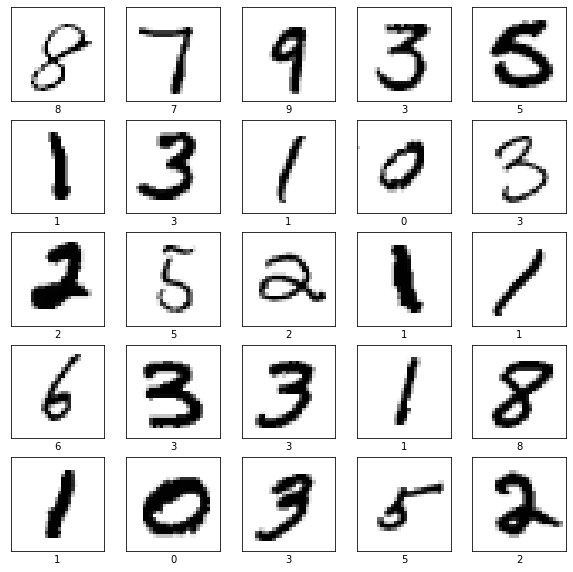

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i][:,:,0], cmap=plt.cm.binary)
    plt.xlabel(y_train.iloc[i])
plt.show()

## Building model

In [ ]:
y_train = np.asarray(y_train) 
y_val = np.asarray(y_val) 

## CNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10)

Train on 37800 samples
Epoch 1/10
37800/37800 [==============================] - 7s 197us/sample - loss: 0.1525 - acc: 0.9520
Epoch 2/10
37800/37800 [==============================] - 5s 133us/sample - loss: 0.0475 - acc: 0.9851
Epoch 3/10
37800/37800 [==============================] - 5s 140us/sample - loss: 0.0304 - acc: 0.9904
Epoch 4/10
37800/37800 [==============================] - 5s 131us/sample - loss: 0.0226 - acc: 0.9924
Epoch 5/10
37800/37800 [==============================] - 5s 133us/sample - loss: 0.0180 - acc: 0.9943
Epoch 6/10
37800/37800 [==============================] - 5s 137us/sample - loss: 0.0128 - acc: 0.9959
Epoch 7/10
37800/37800 [==============================] - 5s 137us/sample - loss: 0.0100 - acc: 0.9969
Epoch 8/10
37800/37800 [==============================] - 5s 136us/sample - loss: 0.0093 - acc: 0.9969
Epoch 9/10
37800/37800 [==============================] - 5s 136us/sample - loss: 0.0072 - acc: 0.9976
Epoch 10/10
37800/37800 [=========================

In [15]:
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)

print('\nTest accuracy:', test_acc)

4200/1 - 0s - loss: 0.4625 - acc: 0.9874

Test accuracy: 0.987381


In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)
predictions = pd.Series(predictions,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

submission.to_csv("gdrive/My Drive/Colab Notebooks/20191223 Digit Recognizer/data/cnn_mnist_datagen.csv",index=False)